In [397]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows',15)

import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

In [398]:
results_df = pd.read_csv('data/1976-2016-president.csv')

In [399]:
results_df.head(10)

##Creating a dictionary of state-state abbr entries to be used across the notebook
states = results_df[results_df.year.isin([2016])]
states = states.filter(items = ['state','state_po'])
states = states.drop_duplicates()
states = states.set_index('state')
swing_states = ['CO','FL','MI','IA','MN','NV','NH','NC','OH','PA','VA','WI','AZ','GA']

In [400]:
##How we are calculating lean
# For each election we look at the margins per state for the previous two elections and aggregate them
# This will be used as the proxy for how a state has leaned in the near past

##2016 lean
years = [2008, 2012]
parties = ['democrat', 'republican']

lean_2016 = results_df[results_df.year.isin(years)]
#MN democrat party is officially called Minnesota Democratic–Farmer–Labor Party 
#https://en.wikipedia.org/wiki/Minnesota_Democratic%E2%80%93Farmer%E2%80%93Labor_Party
lean_2016 = lean_2016.replace({'party' : 'democratic-farmer-labor'},'democrat') 
lean_2016 = lean_2016[lean_2016.party.isin(parties)]

##Some duplicate entries (probably faithless elector votes)
#lean_2016[(results_df['year']==2004) & (lean_2016['state_po'] == 'MD')]
#lean_2016[(results_df['year']==2016) & (lean_2016['state_po'] == 'AZ')]
#lean_2016[(results_df['year']==2016) & (lean_2016['state_po'] == 'MD')]

lean_2016['vote_share'] = round(100 * (lean_2016['candidatevotes']/lean_2016['totalvotes']),2) 
lean_2016 = lean_2016[lean_2016['vote_share'] > 1]  #Few electors voted for Kasich/Sanders
lean_2016 = lean_2016.filter(items = ['year','state_po','party','vote_share'])

lean_2016 = lean_2016.set_index(['year','state_po','party'],verify_integrity=True)

lean_2016 = lean_2016.unstack(level='party')
lean_2016['partisan_lean'] = lean_2016['vote_share']['democrat'] - lean_2016['vote_share']['republican'] 

lean_by_state_2016 = lean_2016.groupby('state_po')['partisan_lean'].mean().to_frame()
lean_by_state_2016.sort_values(by=['partisan_lean'])
lean_by_state_2016
lean_by_state_2016['year']  = 2016

##2012 lean
years = [2004, 2008]
parties = ['democrat', 'republican']

lean_2012 = results_df[results_df.year.isin(years)]
#MN democrat party is officially called Minnesota Democratic–Farmer–Labor Party 
#https://en.wikipedia.org/wiki/Minnesota_Democratic%E2%80%93Farmer%E2%80%93Labor_Party
lean_2012 = lean_2012.replace({'party' : 'democratic-farmer-labor'},'democrat') 
lean_2012 = lean_2012[lean_2012.party.isin(parties)]

lean_2012['vote_share'] = round(100 * (lean_2012['candidatevotes']/lean_2012['totalvotes']),2) 
lean_2012 = lean_2012[lean_2012['vote_share'] > 1]  #Few electors voted for Kasich/Sanders
lean_2012 = lean_2012.filter(items = ['year','state_po','party','vote_share'])

lean_2012 = lean_2012.set_index(['year','state_po','party'],verify_integrity=True)

lean_2012 = lean_2012.unstack(level='party')
lean_2012['partisan_lean'] = lean_2012['vote_share']['democrat'] - lean_2012['vote_share']['republican'] 

lean_by_state_2012 = lean_2012.groupby('state_po')['partisan_lean'].mean().to_frame()
lean_by_state_2012.sort_values(by=['partisan_lean'])
lean_by_state_2012['year']  = 2012

lean_by_state_2012

##2008 lean
years = [2000, 2004]
parties = ['democrat', 'republican']

lean_2008 = results_df[results_df.year.isin(years)]
#MN democrat party is officially called Minnesota Democratic–Farmer–Labor Party 
#https://en.wikipedia.org/wiki/Minnesota_Democratic%E2%80%93Farmer%E2%80%93Labor_Party
lean_2008 = lean_2008.replace({'party' : 'democratic-farmer-labor'},'democrat') 
lean_2008 = lean_2008[lean_2008.party.isin(parties)]

lean_2008['vote_share'] = round(100 * (lean_2008['candidatevotes']/lean_2008['totalvotes']),2) 
lean_2008 = lean_2008[lean_2008['vote_share'] > 1]  #Few electors voted for Kasich/Sanders
lean_2008 = lean_2008.filter(items = ['year','state_po','party','vote_share'])

lean_2008 = lean_2008.set_index(['year','state_po','party'],verify_integrity=True)

lean_2008 = lean_2008.unstack(level='party')
lean_2008['partisan_lean'] = lean_2008['vote_share']['democrat'] - lean_2008['vote_share']['republican'] 

lean_by_state_2008 = lean_2008.groupby('state_po')['partisan_lean'].mean().to_frame()
lean_by_state_2008.sort_values(by=['partisan_lean'])

lean_by_state_2008['year']  = 2008

lean_by_state_2008

lean_by_state = lean_by_state_2016.append(lean_by_state_2012)
lean_by_state = lean_by_state.append(lean_by_state_2008)
lean_by_state = lean_by_state.reset_index()
lean_by_state = lean_by_state.set_index(['state_po','year'])
lean_by_state

,,partisan_lean
state_po,year,
AK,2016,-17.760
AL,2016,-21.885
AR,2016,-21.775
AZ,2016,-8.790
CA,2016,23.590
...,...,...
VT,2008,15.035
WA,2008,6.380
WI,2008,0.300


In [401]:
##URBAN LEAN DATA - CENSUS 2010
urban_rural_pop_2010 = pd.read_csv('data/census_urban_rural_population.csv')

urban_rural_pop_2010 = urban_rural_pop_2010.filter(items = ['NAME','H002001','H002002'])

urban_rural_pop_2010 = urban_rural_pop_2010.drop(0,axis=0)


urban_rural_pop_2010 = urban_rural_pop_2010.rename(columns={"NAME" : "state",
                                                  "H002001": "total_population", 
                                                  "H002002": "urban_population" })

urban_rural_pop_2010 = urban_rural_pop_2010[urban_rural_pop_2010.state != 'Puerto Rico'] # :( sorry PR, no statehood for you 

urban_rural_pop_2010 = urban_rural_pop_2010.set_index('state')
urban_rural_pop_2010 = urban_rural_pop_2010.join(states)

urban_rural_pop_2010 = urban_rural_pop_2010.set_index('state_po')

urban_rural_pop_2010 = urban_rural_pop_2010.astype({'total_population': 'int32', 'urban_population' : 'int32'})
urban_rural_pop_2010["pct_urban"] = urban_rural_pop_2010['urban_population'] / urban_rural_pop_2010['total_population']


In [402]:

##US urbanization growth by year (https://www.statista.com/statistics/269967/urbanization-in-the-united-states/)
#2008 - 80.44 - -0.33
#2010 - 80.77 - 0
#2012 - 81.12 - 0.35
#2016 - 81.86 - 0.89
#2019 - 82.46 - 1.69

#use this data to interpolate urbanization percent growth by year

urban_rural_pop_2008 = urban_rural_pop_2010
urban_rural_pop_2008 = urban_rural_pop_2008.drop(['total_population','urban_population'],axis=1)
urban_rural_pop_2008 = urban_rural_pop_2008["pct_urban"] - 0.0033
urban_rural_pop_2008 = urban_rural_pop_2008.to_frame()
urban_rural_pop_2008['year'] = 2008

urban_rural_pop_2012 = urban_rural_pop_2010
urban_rural_pop_2012 = urban_rural_pop_2012.drop(['total_population','urban_population'],axis=1)
urban_rural_pop_2012 = urban_rural_pop_2012["pct_urban"] + 0.0035
urban_rural_pop_2012 = urban_rural_pop_2012.to_frame()
urban_rural_pop_2012['year'] = 2012

urban_rural_pop_2016 = urban_rural_pop_2010
urban_rural_pop_2016 = urban_rural_pop_2016.drop(['total_population','urban_population'],axis=1)
urban_rural_pop_2016 = urban_rural_pop_2016["pct_urban"] + 0.0089
urban_rural_pop_2016 = urban_rural_pop_2016.to_frame()
urban_rural_pop_2016['year'] = 2016

urban_rural_pop = urban_rural_pop_2008.append(urban_rural_pop_2012)
urban_rural_pop = urban_rural_pop.append(urban_rural_pop_2016)

urban_rural_pop = urban_rural_pop.reset_index()

urban_rural_pop = urban_rural_pop.set_index(['state_po','year'])

urban_rural_pop

,,pct_urban
state_po,year,
AL,2008,0.580176
AK,2008,0.592819
AZ,2008,0.881032
AR,2008,0.544132
CA,2008,0.933441
...,...,...
VA,2016,0.739412
WA,2016,0.833600
WV,2016,0.490173


In [403]:
## ACS Education level data
## 2010 (use for 2008 election)

acs_education_2010 = pd.read_csv('data/acs_2010_education_survey.csv')

acs_education_2010 = acs_education_2010.filter(items = ['NAME',
                                                        'S1501_C01_015E']) ##pct bachelors degree or higher 25+                                             
acs_education_2010 = acs_education_2010.drop(0,axis=0)

acs_education_2010 = acs_education_2010.rename(columns={"NAME" : "state",
                                                      "S1501_C01_015E": "pct_college_educated"})
                                               
acs_education_2010 = acs_education_2010[acs_education_2010.state != 'Puerto Rico'] # :(   
acs_education_2010 = acs_education_2010.astype({'pct_college_educated' : 'float32'})
                                               
acs_education_2010['pct_college_educated'] = acs_education_2010['pct_college_educated'] / 100

acs_education_2010 = acs_education_2010.set_index('state')
acs_education_2010 = acs_education_2010.join(states)
acs_education_2010 = acs_education_2010.set_index('state_po')


acs_education_2010['year'] = 2008 
acs_education_2010 = acs_education_2010.reset_index()

acs_education_2010

## 2012 (use for 2012 election)
acs_education_2012 = pd.read_csv('data/acs_2012_education_survey.csv')

acs_education_2012 = acs_education_2012.filter(items = ['NAME',
                                                        'S1501_C01_015E']) ##pct bachelors degree or higher 25+
                                         
acs_education_2012 = acs_education_2012.drop(0,axis=0)

acs_education_2012 = acs_education_2012.rename(columns={"NAME" : "state",
                                                      "S1501_C01_015E": "pct_college_educated"})

acs_education_2012 = acs_education_2012[acs_education_2012.state != 'Puerto Rico'] # :(       
acs_education_2012 = acs_education_2012.astype({'pct_college_educated' : 'float32'})
                                               
acs_education_2012['pct_college_educated'] = acs_education_2012['pct_college_educated'] / 100

acs_education_2012 = acs_education_2012.set_index('state')
acs_education_2012 = acs_education_2012.join(states)
acs_education_2012 = acs_education_2012.set_index('state_po')

acs_education_2012['year'] = 2012 
acs_education_2012 = acs_education_2012.reset_index()


## 2016 (use for 2016 election)
acs_education_2016 = pd.read_csv('data/acs_2016_education_survey.csv')


acs_education_2016 = acs_education_2016.filter(items = ['NAME',
                                                        'S1501_C01_006E', #pop 25+
                                                        'S1501_C01_012E', #bachelors degree 25+
                                                        'S1501_C01_013E']) #grad degree 25+

acs_education_2016 = acs_education_2016.drop(0,axis=0)

acs_education_2016 = acs_education_2016.rename(columns={"NAME" : "state",
                                                  "S1501_C01_006E": "pop_25_plus",
                                                  "S1501_C01_012E": "pop_25_plus_bachelors",
                                                  "S1501_C01_013E": "pop_25_plus_graduate"})


acs_education_2016 = acs_education_2016.astype({'pop_25_plus' : 'int32',
                                                  'pop_25_plus_bachelors' : 'int32',
                                                  'pop_25_plus_graduate' : 'int32'})



acs_education_2016['college_educated_pop'] = acs_education_2016['pop_25_plus_bachelors'] + acs_education_2016['pop_25_plus_graduate']

acs_education_2016['pct_college_educated'] = acs_education_2016['college_educated_pop'] / acs_education_2016['pop_25_plus']

acs_education_2016 = acs_education_2016[acs_education_2016.state != 'Puerto Rico'] # :(

acs_education_2016 = acs_education_2016.set_index('state')
acs_education_2016 = acs_education_2016.join(states) 
acs_education_2016 = acs_education_2016.set_index('state_po')
acs_education_2016 = acs_education_2016.reset_index()

acs_education_2016['year'] = 2016 #using 2015 data for 2016 results

acs_education = acs_education_2010.append(acs_education_2012)
acs_education = acs_education.append(acs_education_2016)
acs_education = acs_education.reset_index()
acs_education = acs_education.drop(['pop_25_plus','pop_25_plus_bachelors','pop_25_plus_graduate','college_educated_pop'], axis=1)

acs_education = acs_education.set_index(['state_po','year'])

acs_education

,,index,pct_college_educated
state_po,year,,
CA,2008,0,0.301000
AL,2008,1,0.219000
AK,2008,2,0.279000
AZ,2008,3,0.259000
AR,2008,4,0.195000
...,...,...,...
VA,2016,46,0.380811
WA,2016,47,0.351384
WV,2016,48,0.208055


In [404]:
# Reads in percentage of registered voters that are under 45, black, and hispanic for each state
# Age 45 used as cutoff due to limited data from smaller states
# Data labeled Year 2020 is Year 2018 (can calculate expected 2020 or find 2020 data, but using 2018 for now)
# Have not (yet) incorporated voter turnout data (unlikely to be able to predict just with 2018 data)

age_race = pd.read_csv('data/race_age_data.csv')

age_race_old = age_race[age_race.year.isin([2008,2012,2016])]
age_race_old = age_race_old.set_index(['state_po','year'])

age_race_2020 = age_race[age_race.year.isin([2020])]
age_race_2020 = age_race_2020.set_index(['state_po','year'])

In [405]:
## This is our result data i.e. what was the actual margin of victory in that election cycle

result_margins = results_df[results_df.year.isin([2008,2012,2016])]
result_margins = result_margins.replace({'party' : 'democratic-farmer-labor'},'democrat') 

result_margins = result_margins[result_margins.party.isin(parties)]
result_margins['vote_share'] = round(100 * (result_margins['candidatevotes']/result_margins['totalvotes']),2) 
result_margins = result_margins[result_margins['vote_share'] > 1] ##There were a few people who voted for Sanders/Kasich in 2016

result_margins = result_margins.filter(items = ['year','state_po','party','vote_share'])

result_margins = result_margins.set_index(['year','state_po','party'],verify_integrity=True)

result_margins = result_margins.unstack(level='party')

result_margins['margin'] = result_margins['vote_share']['democrat'] - result_margins['vote_share']['republican'] 

result_margins = result_margins['margin']
result_margins.to_frame()
result_margins = result_margins.reset_index()

result_margins = result_margins.set_index(['state_po','year'])
result_margins

,,margin
state_po,year,
AK,2008,-21.53
AL,2008,-21.58
AR,2008,-19.86
AZ,2008,-8.52
CA,2008,24.06
...,...,...
VT,2016,25.96
WA,2016,15.71
WI,2016,-0.77


In [406]:
final_data_set = lean_by_state.join(urban_rural_pop)
final_data_set = final_data_set.join(acs_education)
final_data_set = final_data_set.join(age_race_old)
final_data_set = final_data_set.join(result_margins)

final_data_set = final_data_set.reset_index()

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(final_data_set[['partisan_lean','pct_urban','pct_college_educated','pct_reg_under45','pct_reg_black','pct_reg_hispanic']], final_data_set['margin'].to_frame(), test_size=0.20)

X_train

,partisan_lean,pct_urban,pct_college_educated,pct_reg_under45,pct_reg_black,pct_reg_hispanic
55,17.005,0.940241,0.309000,0.443670,0.085569,0.239906
121,26.015,0.910556,0.390000,0.396903,0.048588,0.031278
93,-14.670,0.659736,0.243000,0.416511,0.164174,0.033333
16,-18.340,0.739481,0.328460,0.406815,0.057024,0.052851
5,7.155,0.839931,0.398579,0.463533,0.043899,0.094020
...,...,...,...,...,...,...
130,-27.480,0.570058,0.276000,0.428571,0.005013,0.007519
124,4.275,0.715256,0.252000,0.450371,0.136684,0.015368
32,12.640,0.759985,0.271840,0.377729,0.036026,0.371179
122,14.650,0.868190,0.361000,0.435290,0.302334,0.032885


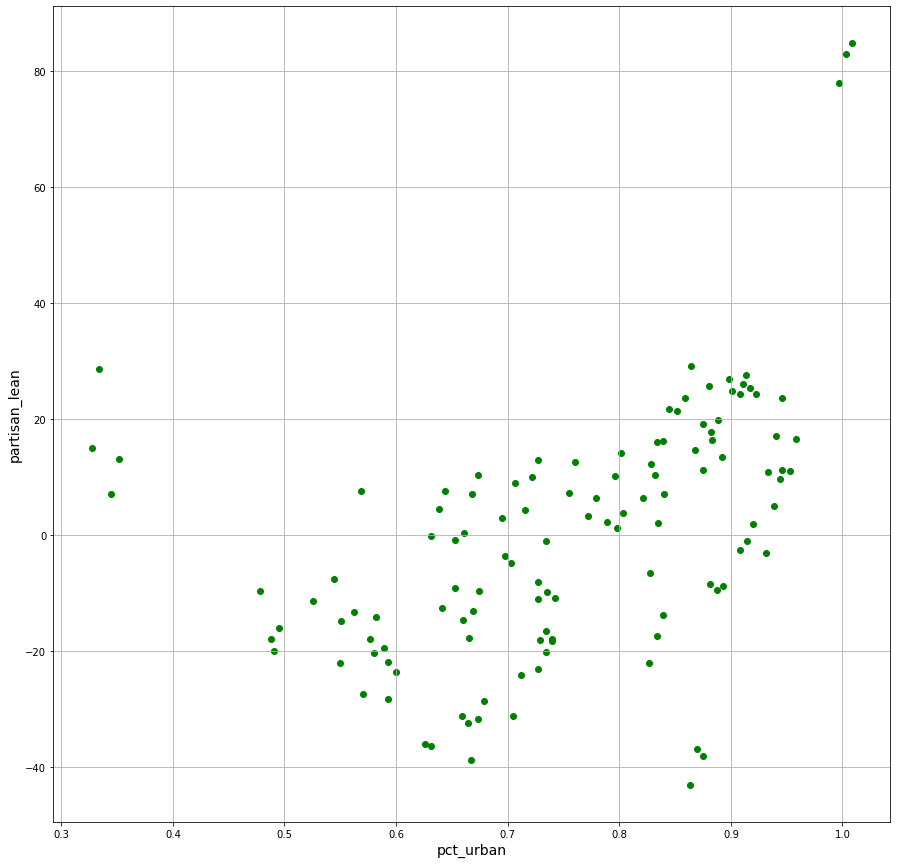

In [407]:
##JUST SOME VISUALIZATIONS
plt.scatter(X_train['pct_urban'], X_train['partisan_lean'], color='green')
#plt.title('rep_event_count Vs margin_of_victory', fontsize=14)
plt.xlabel('pct_urban', fontsize=14)
plt.ylabel('partisan_lean', fontsize=14)
plt.grid(True)
plt.show()

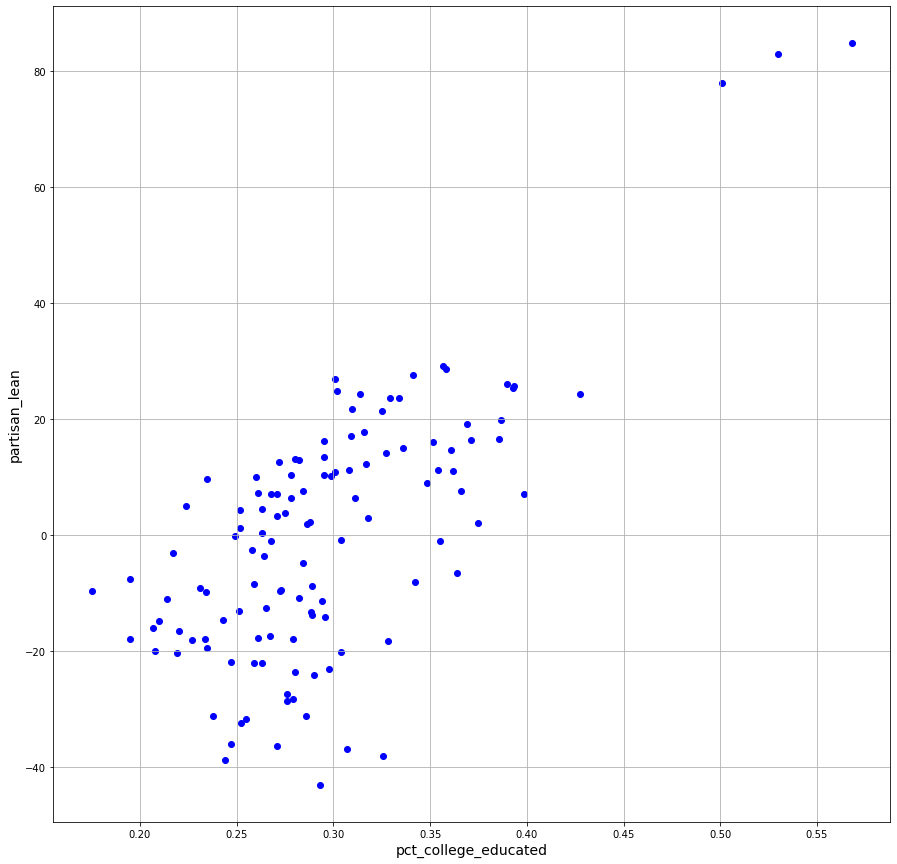

In [408]:
plt.scatter(X_train['pct_college_educated'], X_train['partisan_lean'], color='blue')
#plt.title('rep_event_count Vs margin_of_victory', fontsize=14)
plt.xlabel('pct_college_educated', fontsize=14)
plt.ylabel('partisan_lean', fontsize=14)
plt.grid(True)
plt.show()

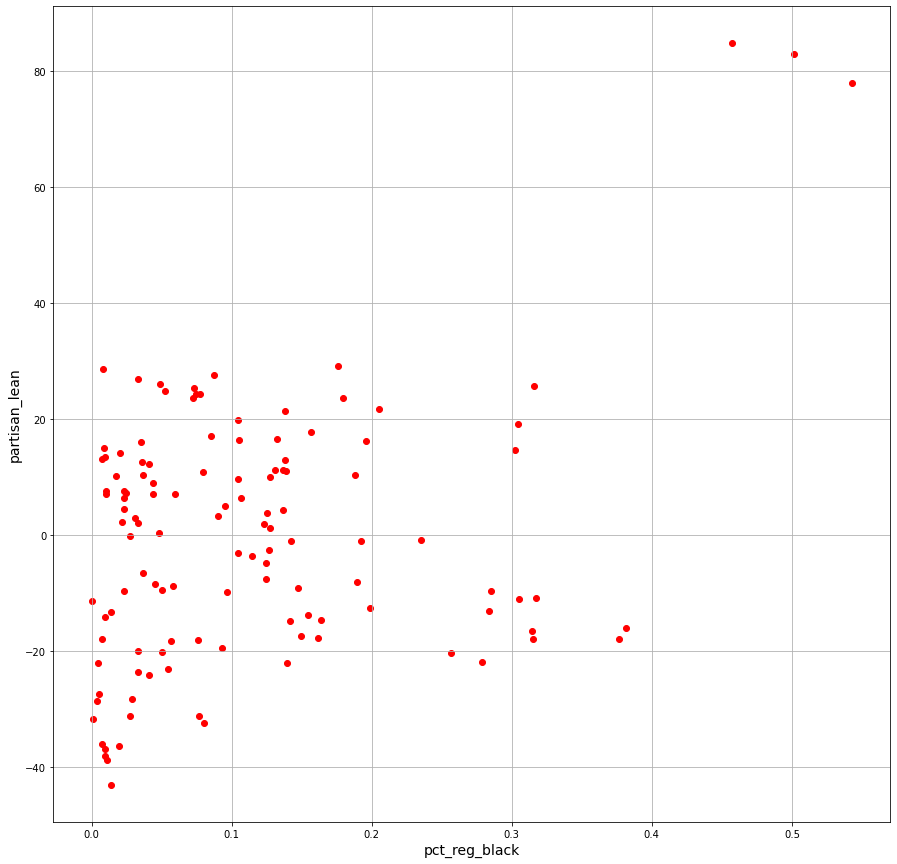

In [409]:
plt.scatter(X_train['pct_reg_black'], X_train['partisan_lean'], color='red')
#plt.title('rep_event_count Vs margin_of_victory', fontsize=14)
plt.xlabel('pct_reg_black', fontsize=14)
plt.ylabel('partisan_lean', fontsize=14)
plt.grid(True)
plt.show()

In [ ]:
#NO NEED TO RUN THIS
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train[['partisan_lean','pct_urban','pct_college_educated','pct_reg_under45','pct_reg_black','pct_reg_hispanic']], Y_train['margin'])

In [ ]:
#NO NEED TO RUN THIS
##Decision Tree Block - FIRST RUN 

Y_train.loc[Y_train['margin'] > 0, 'result'] = 'DEM'
Y_train.loc[Y_train['margin'] <= 0, 'result'] = 'REP'


from sklearn import tree

clf = tree.DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train[['partisan_lean','pct_urban','pct_college_educated','pct_reg_under45','pct_reg_black','pct_reg_hispanic']], Y_train['result'])

import numpy as np
sorted_labels = Y_train['result'].unique()
sorted_labels = np.sort(sorted_labels)
sorted_labels = list(map(str, sorted_labels))
sorted_labels


x = tree.plot_tree(clf,rounded=True,filled=True,class_names=sorted_labels,feature_names=['partisan_lean','pct_urban','pct_college_educated','pct_reg_under45','pct_reg_black','pct_reg_hispanic']) 

plt.savefig('images/tree.png')

In [ ]:
#NO NEED TO RUN THIS
#setup plots for confusion matrix
from sklearn.metrics import plot_confusion_matrix as matrix
figSize = plt.rcParams["figure.figsize"]
figSize[0] = 10
figSize[1] = 10

Y_test.loc[Y_test['margin'] > 0, 'result'] = 'DEM'
Y_test.loc[Y_test['margin'] <= 0, 'result'] = 'REP'
#plot the confusion matrices 1 for normalzied the other un-normalized
values = ['true',None]
#cmap='cividis'
for x in values:
    disp = matrix(clf,X_test[['partisan_lean','pct_urban','pct_college_educated','pct_reg_under45','pct_reg_black','pct_reg_hispanic']],Y_test['result'],display_labels=sorted_labels,normalize=x)
    disp.ax_.set_title("Confusion matrix (Decision Tree) with normalization = "+ str(x))
    plt.savefig('images/confusion-decision-tree-' + str(x) + '.png')


In [ ]:
#NO NEED TO RUN THIS
#setup plots for confusion matrix
from sklearn.metrics import confusion_matrix
figSize = plt.rcParams["figure.figsize"]
figSize[0] = 10
figSize[1] = 10

Y_test.loc[Y_test['margin'] > 0, 'result'] = 'DEM'
Y_test.loc[Y_test['margin'] <= 0, 'result'] = 'REP'
#plot the confusion matrices 1 for normalzied the other un-normalized
values = ['true',None]
#cmap='cividis'
test_regr_outcome = []
    
for index, row in X_test.iterrows():
    sample = np.array([row['partisan_lean'],row['pct_urban'],row['pct_college_educated'],row['pct_reg_under45'],row['pct_reg_black'],row['pct_reg_hispanic']]).reshape(1,-1)
    margin = regr.predict(sample)
    test_regr_outcome.append({'Idx': str(index), 'Exp_Margin':str(margin[0])})
    
test_regr_outcome_df = pd.DataFrame(test_regr_outcome)
test_regr_outcome_df = test_regr_outcome_df.set_index(['Idx'])

test_regr_outcome_df = test_regr_outcome_df.astype({'Exp_Margin': 'float32'})

test_regr_outcome_df['Exp_Win'] = np.where(test_regr_outcome_df['Exp_Margin'] > 0, 'DEM', 'REP')

test_regr_matrix = confusion_matrix(test_regr_outcome_df['Exp_Win'], Y_test['result'])

import seaborn as sns
x_axis_labels =['DEM','REP']
y_axis_labels =['DEM','REP']
sns_plot = sns.heatmap(test_regr_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True)
sns_fig = sns_plot.get_figure()
sns_fig.savefig("images/confusion-regression.png")

In [411]:
##CROSS VALIDATION - LINEAR REGRESSION
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

X = final_data_set[['partisan_lean','pct_urban','pct_college_educated','pct_reg_under45','pct_reg_black','pct_reg_hispanic']]
Y = final_data_set['margin']

#cross validate 
regr_models = pd.DataFrame(columns=["score","model"])

#shuffle reorders the data for less bias
kf = KFold(n_splits = 5, shuffle = True)#, random_state = 0)
i=0

for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train = X.iloc[train_index]
    x_test = X.iloc[test_index]
    
    y_train = Y.iloc[train_index]
    y_test= Y.iloc[test_index]
    
    #create the model
    r_model = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
    r_model = r_model.fit(x_train,y_train)
    
    
    #print(x_test.shape)
    #get predictions based on x_test (unseen data)
    predictions = r_model.predict(x_test)
    
    #calculate r^2 error
    error = r2_score(y_test,predictions)
    #print("model error = ",error)
    
    regr_models.loc[i] = [error,r_model]
    
    #increment index in dataframe
    i = i+1
regr_models

,score,model
0,0.890059,"(PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,\n order='C'), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))"
1,0.816343,"(PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,\n order='C'), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))"
2,0.850468,"(PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,\n order='C'), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))"
3,0.773854,"(PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,\n order='C'), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))"
4,0.808746,"(PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,\n order='C'), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))"


In [412]:
##FIND CROSS VALIDATION METRICS FOR REGRESSION IN THIS BLOCK
low_val = regr_models.score.min()
high_val = regr_models.score.max()
mean_val = regr_models.score.mean()
sdev = regr_models.score.std()
print('low_val = ',low_val)

least = regr_models.query("score == "+str(low_val))
regr_final_model = least['model'].values[0]
regr_final_model
print(f"cross validation metrics, worst case accuracy = {low_val}, average = {mean_val}, best case = {high_val}, all +-{2*sdev} @ 95%")

low_val =  0.7738538974090073
cross validation metrics, worst case accuracy = 0.7738538974090073, average = 0.8278939598922758, best case = 0.8900588713653869, all +-0.08828635567602061 @ 95%


In [413]:
#now create a new model with all the data as the running model but remember to use your cross val score
#as your accuracy
regr_final_model = make_pipeline(PolynomialFeatures(1), linear_model.LinearRegression())
regr_final_model = regr_final_model.fit(X, Y)
final_predictions = regr_final_model.predict(X)
final_error = r2_score(Y,final_predictions)
high_val = models.score.max()
mean_val = models.score.mean()
sdev = models.score.std()
print(f"final error run on all data = {final_error}")

final error run on all data = 0.8581680703930044


model score =  0.8709677419354839
model score =  0.9354838709677419
model score =  0.8709677419354839
model score =  0.8666666666666667
model score =  0.9333333333333333


,score,model
0,0.870968,"(PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,\n order='C'), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))"
1,0.935484,"(PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,\n order='C'), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))"
2,0.870968,"(PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,\n order='C'), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))"
3,0.866667,"(PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,\n order='C'), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))"
4,0.933333,"(PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,\n order='C'), LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))"


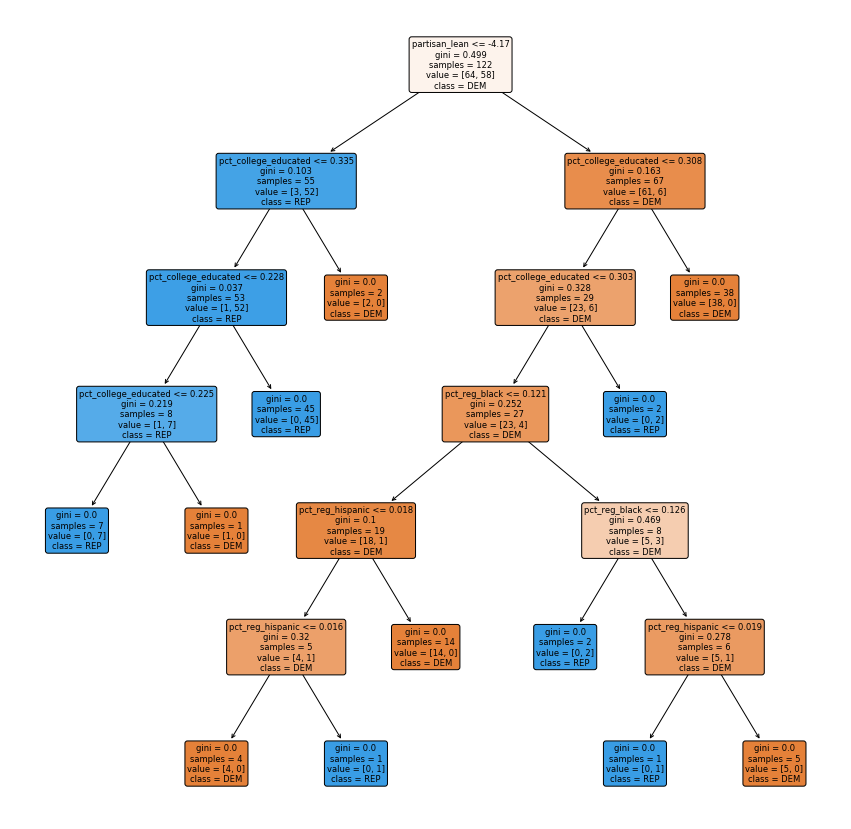

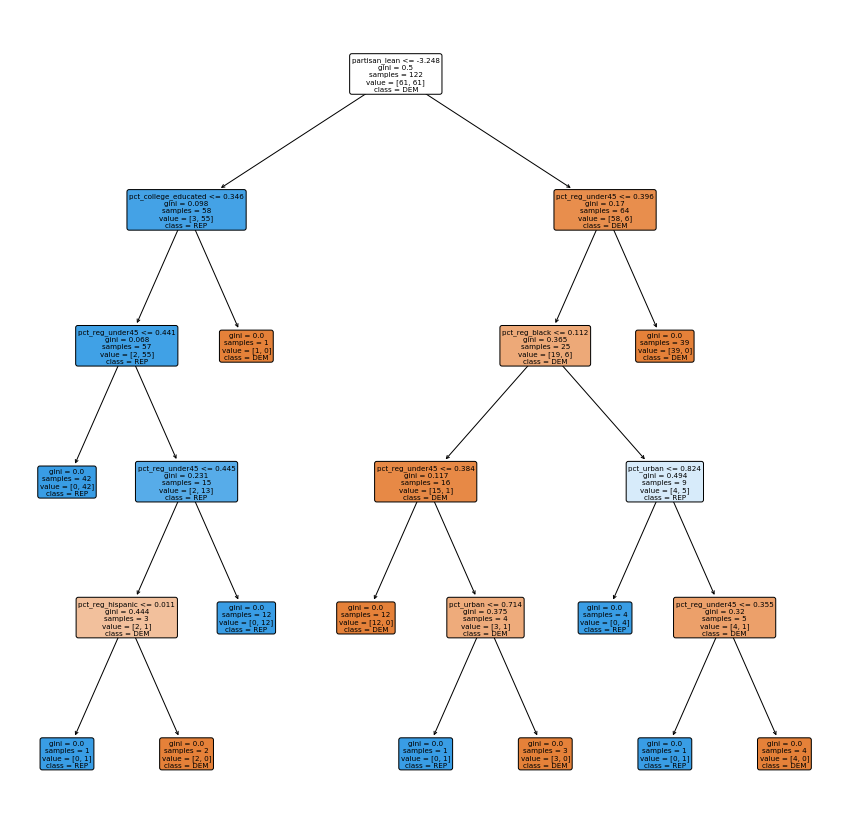

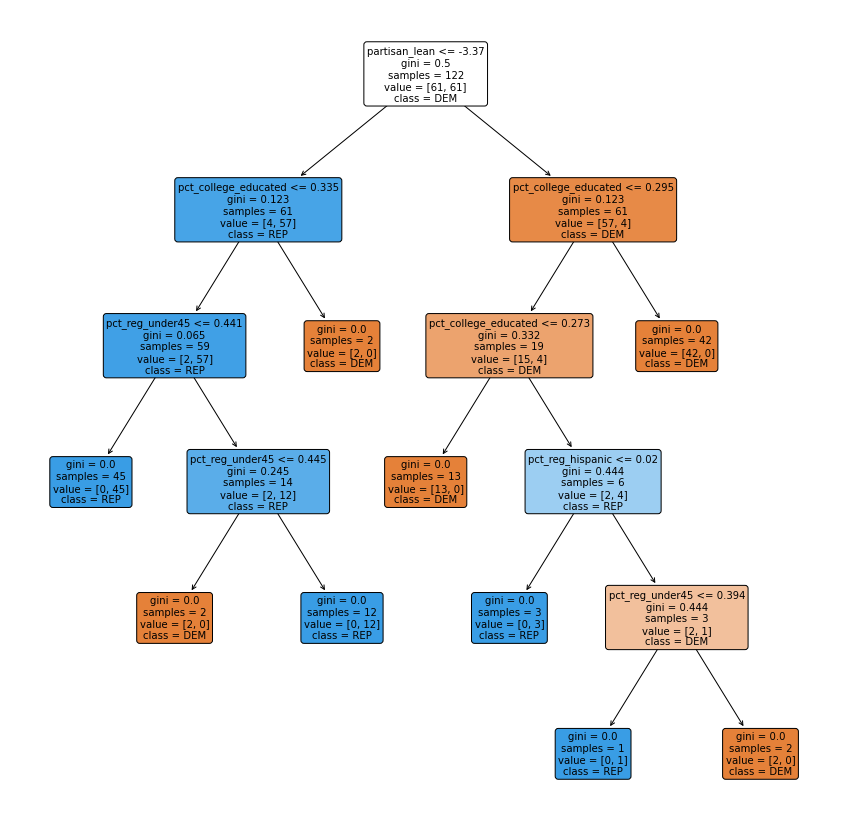

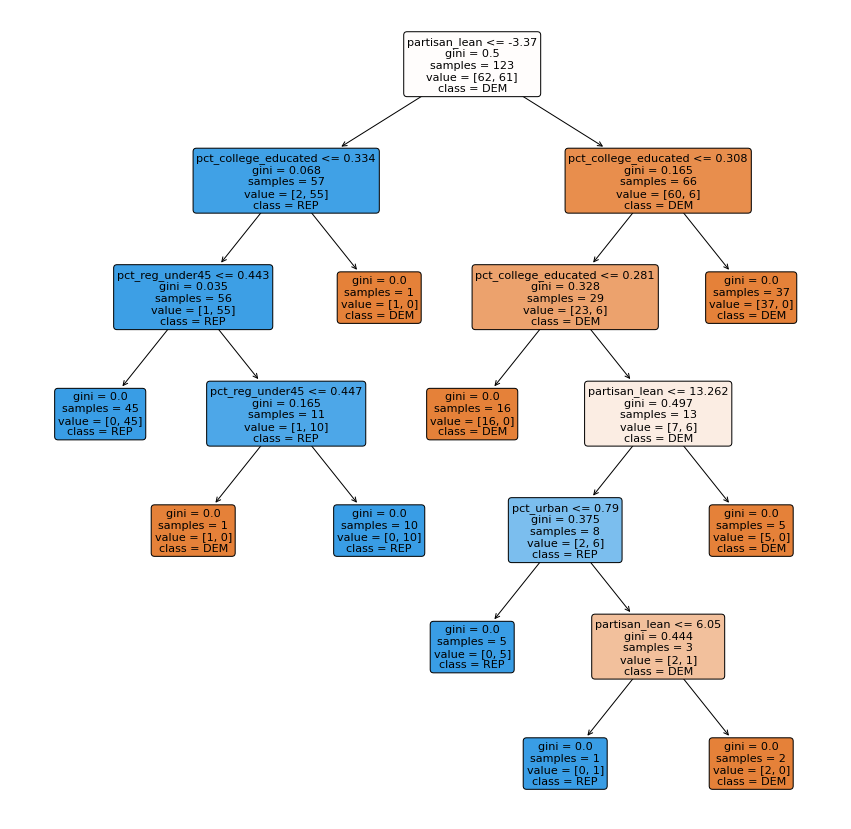

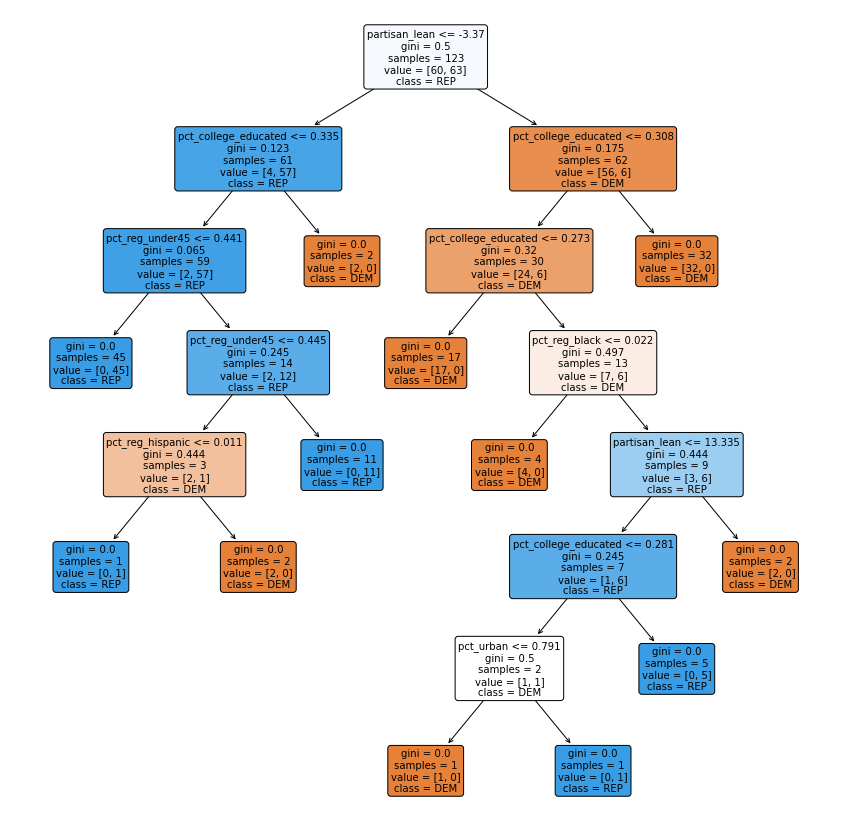

In [414]:
##CROSS VALIDATION - DECISION TREE 
from sklearn.model_selection import KFold

dt_models = pd.DataFrame(columns=["score","model"])

X = final_data_set[['partisan_lean','pct_urban','pct_college_educated','pct_reg_under45','pct_reg_black','pct_reg_hispanic']]
Y = final_data_set['margin']

Y = Y.to_frame()

Y.loc[Y['margin'] > 0, 'result'] = 'DEM'
Y.loc[Y['margin'] <= 0, 'result'] = 'REP'

Y_label = Y['result']

kf = KFold(n_splits = 5, shuffle = True)
i=0
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    x_train = X.iloc[train_index]
    x_test = X.iloc[test_index]
    y_train = Y_label.iloc[train_index]
    y_test= Y_label.iloc[test_index]
    
    #train the model
    dt_model = clf.fit(x_train,y_train)
    predictions = clf.predict(x_test)
    print("model score = ",dt_model.score(x_test,y_test))
    
    #print('Scores from each Iteration: ', scores)
    #print('Average K-Fold Score :' , np.mean(scores)) 
    plt.figure()
    x = tree.plot_tree(dt_model,rounded=True,filled=True,class_names=sorted_labels,feature_names=['partisan_lean','pct_urban','pct_college_educated','pct_reg_under45','pct_reg_black','pct_reg_hispanic']) 
    #assign model to dataframe
    dt_models.loc[i] = [dt_model.score(x_test,y_test),model]
    #clf = model
    #increment index in dataframe
    i = i+1
dt_models

In [415]:
##FIND CROSS VALIDATION METRICS FOR DECISION TREE IN THIS BLOCK
dt_low_val = dt_models.score.min()
dt_high_val = dt_models.score.max()
dt_mean_val = dt_models.score.mean()
dt_sdev = dt_models.score.std()
print('low_val = ',dt_low_val)

least = dt_models.query("score == "+str(dt_low_val))
dt_final_model = least['model'].values[0]
dt_final_model
print(f"cross validation metrics, worst case accuracy = {dt_low_val}, average = {dt_mean_val}, best case = {dt_high_val}, all +-{2 * dt_sdev} @ 95%")

low_val =  0.8666666666666667
cross validation metrics, worst case accuracy = 0.8666666666666667, average = 0.895483870967742, best case = 0.9354838709677419, all +-0.0711694754128965 @ 95%


final error/accuracy run on all data = 0.8581680703930044


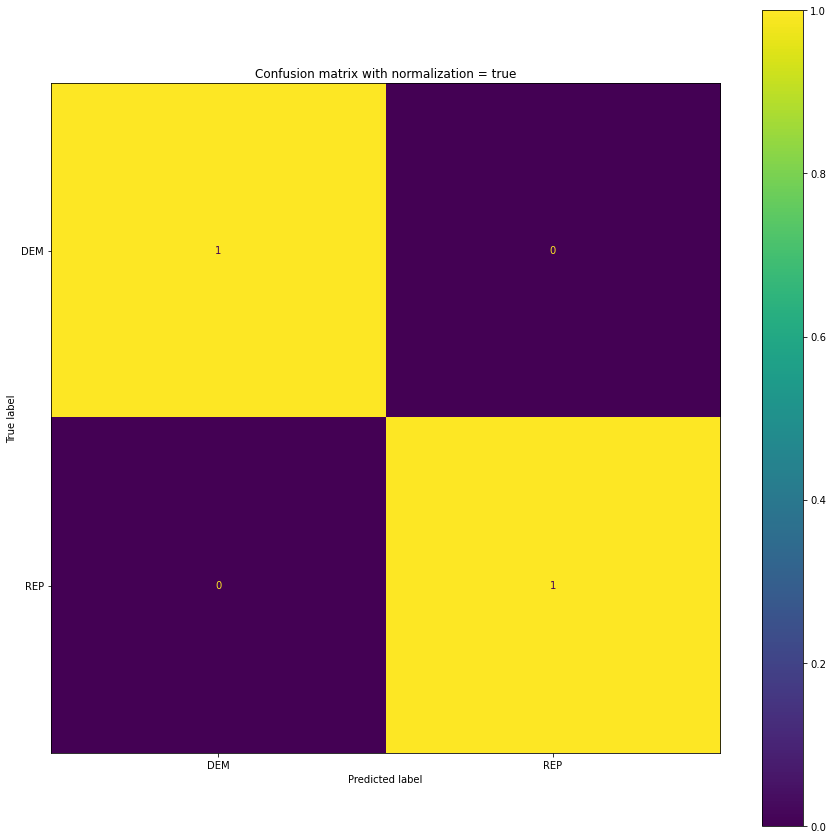

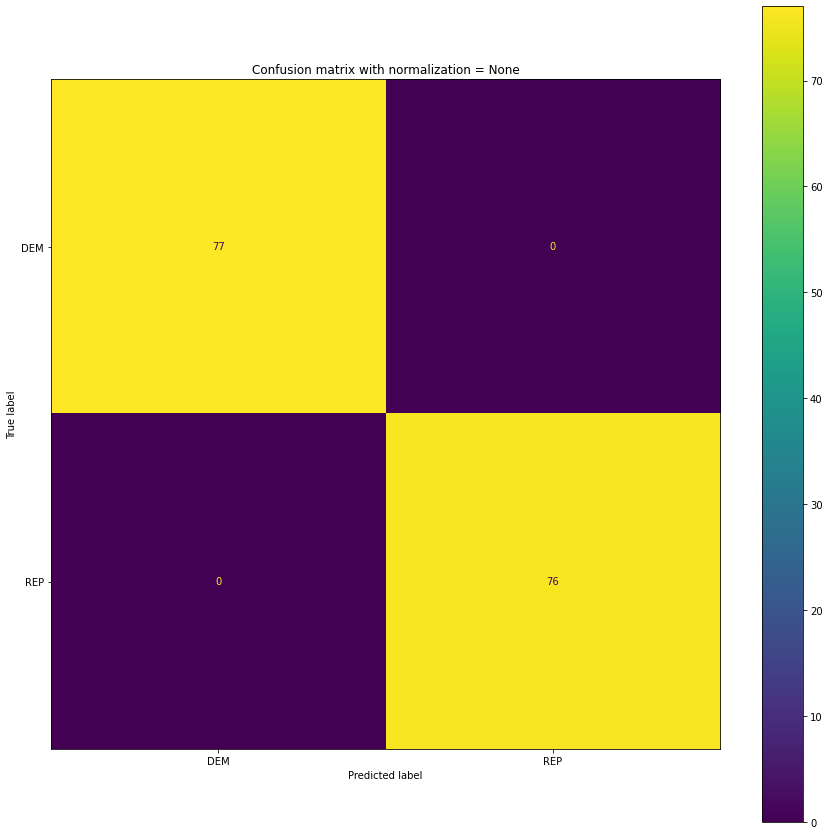

In [416]:
clf_final_model = tree.DecisionTreeClassifier(random_state=0)
clf_final_model = clf_final_model.fit(X,Y_label)
dt_final_predictions = clf_final_model.predict(X)


dt_final_error = clf.score(X,dt_final_predictions)
print(f"final error/accuracy run on all data = {final_error}")

figSize = plt.rcParams["figure.figsize"]
plt.rcParams["figure.figsize"]=figSize
#print(plt.rcParams.get('figure.figsize'))

#plot the confusion matrices 1 for normalzied the other un-normalized
values = ['true',None]
#cmap='cividis'
for x in values:
    disp = matrix(clf_final_model,X,Y_label,display_labels=sorted_labels,normalize=x)
    disp.ax_.set_title("Confusion matrix with normalization = "+str(x))

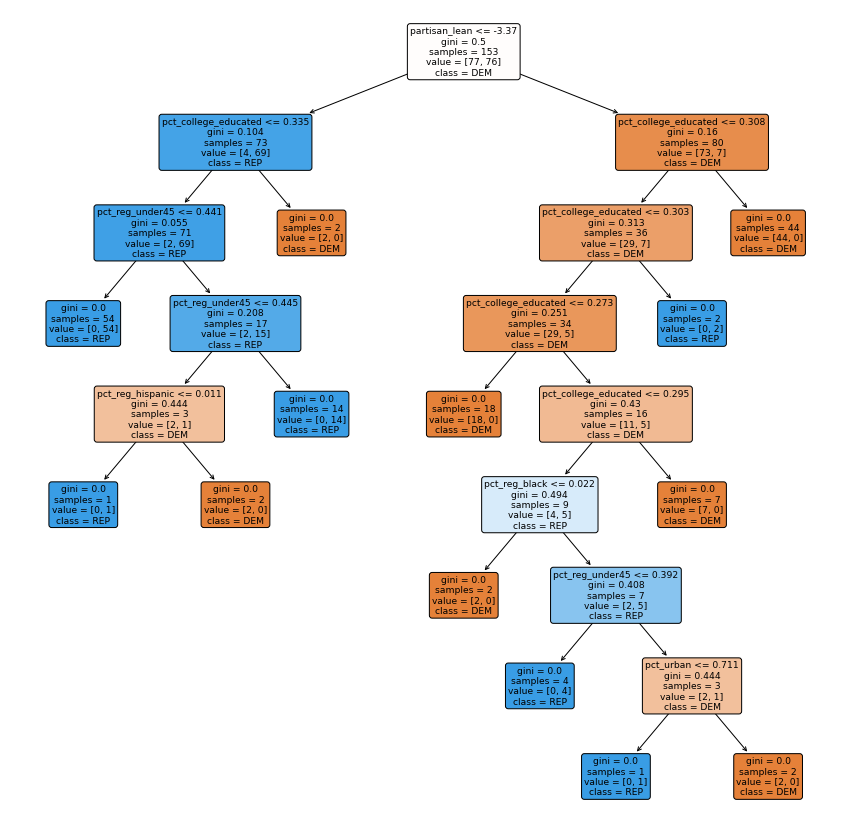

In [417]:
x = tree.plot_tree(clf_final_model,rounded=True,filled=True,class_names=sorted_labels,feature_names=['partisan_lean','pct_urban','pct_college_educated','pct_reg_under45','pct_reg_black','pct_reg_hispanic']) 

In [418]:
#PREDICTING 2020 results using our models
years = [2012, 2016]
parties = ['democrat', 'republican']

lean_2020 = results_df[results_df.year.isin(years)]
#MN democrat party is officially called Minnesota Democratic–Farmer–Labor Party 
#https://en.wikipedia.org/wiki/Minnesota_Democratic%E2%80%93Farmer%E2%80%93Labor_Party
lean_2020 = lean_2020.replace({'party' : 'democratic-farmer-labor'},'democrat') 
lean_2020 = lean_2020[lean_2020.party.isin(parties)]

lean_2020['vote_share'] = round(100 * (lean_2020['candidatevotes']/lean_2020['totalvotes']),2) 
lean_2020 = lean_2020[lean_2020['vote_share'] > 1]  #Few electors voted for Kasich/Sanders
lean_2020 = lean_2020.filter(items = ['year','state_po','party','vote_share'])

lean_2020 = lean_2020.set_index(['year','state_po','party'],verify_integrity=True)

lean_2020 = lean_2020.unstack(level='party')
lean_2020['partisan_lean'] = lean_2020['vote_share']['democrat'] - lean_2020['vote_share']['republican'] 

lean_2020 = lean_2020.groupby('state_po')['partisan_lean'].mean().to_frame()
lean_2020.sort_values(by=['partisan_lean'])
lean_2020['year']  = 2020

lean_2020

urban_rural_pop_2020 = urban_rural_pop_2010
urban_rural_pop_2020 = urban_rural_pop_2020.drop(['total_population','urban_population'],axis=1)
urban_rural_pop_2020 = urban_rural_pop_2020["pct_urban"] + 0.0089
urban_rural_pop_2020 = urban_rural_pop_2020.to_frame()
urban_rural_pop_2020['year'] = 2020

urban_rural_pop_2020 = urban_rural_pop_2020.reset_index()
urban_rural_pop_2020 = urban_rural_pop_2020.set_index(['state_po','year'])

urban_rural_pop_2020

## 2019 (use for 2020 election)
acs_education_2020 = pd.read_csv('data/acs_2019_education_survey.csv')


acs_education_2020 = acs_education_2020.filter(items = ['NAME',
                                                        'S1501_C01_006E', #pop 25+
                                                        'S1501_C01_012E', #bachelors degree 25+
                                                        'S1501_C01_013E']) #grad degree 25+

acs_education_2020 = acs_education_2020.drop(0,axis=0)

acs_education_2020 = acs_education_2020.rename(columns={"NAME" : "state",
                                                  "S1501_C01_006E": "pop_25_plus",
                                                  "S1501_C01_012E": "pop_25_plus_bachelors",
                                                  "S1501_C01_013E": "pop_25_plus_graduate"})


acs_education_2020 = acs_education_2020.astype({'pop_25_plus' : 'int32',
                                                  'pop_25_plus_bachelors' : 'int32',
                                                  'pop_25_plus_graduate' : 'int32'})



acs_education_2020['college_educated_pop'] = acs_education_2020['pop_25_plus_bachelors'] + acs_education_2020['pop_25_plus_graduate']

acs_education_2020['pct_college_educated'] = acs_education_2020['college_educated_pop'] / acs_education_2020['pop_25_plus']

acs_education_2020 = acs_education_2020[acs_education_2020.state != 'Puerto Rico'] # :(

acs_education_2020 = acs_education_2020.set_index('state')
acs_education_2020 = acs_education_2020.join(states) 
acs_education_2020 = acs_education_2020.set_index('state_po')
acs_education_2020 = acs_education_2020.reset_index()

acs_education_2020['year'] = 2020 #using 2015 data for 2016 results
acs_education_2020 = acs_education_2020.drop(['pop_25_plus','pop_25_plus_bachelors','pop_25_plus_graduate','college_educated_pop'], axis=1)
acs_education_2020 = acs_education_2020.set_index(['state_po','year'])
acs_education_2020


urban_rural_pop_2020

,,pct_urban
state_po,year,
AL,2020,0.592376
AK,2020,0.605019
AZ,2020,0.893232
AR,2020,0.556332
CA,2020,0.945641
...,...,...
VA,2020,0.739412
WA,2020,0.833600
WV,2020,0.490173


In [419]:
#PREDICT USING BOTH MODELS
predict_data_set = lean_2020.join(urban_rural_pop_2020)
predict_data_set = predict_data_set.join(acs_education_2020)
predict_data_set = predict_data_set.join(age_race_2020)

regr_outcome = []
dtree_outcome = []

for index, row in predict_data_set.iterrows():
    sample = np.array([row['partisan_lean'],row['pct_urban'],row['pct_college_educated'],row['pct_reg_under45'],row['pct_reg_black'],row['pct_reg_hispanic']]).reshape(1,-1)
    margin = regr_final_model.predict(sample)
    regr_outcome.append({'State': str(index[0]), 'Exp_Margin':str(margin[0])})
    dt_predict = clf_final_model.predict(sample)
    dtree_outcome.append({'State': str(index[0]), 'Exp_Win':str(dt_predict[0])})
    #print("Democrat margin for state " + str(index[0]) + " expected to be " + str(margin[0]))
    
regr_outcome_df = pd.DataFrame(regr_outcome)
regr_outcome_df = regr_outcome_df.set_index(['State'])

dtree_outcome_df = pd.DataFrame(dtree_outcome)
dtree_outcome_df = dtree_outcome_df.set_index(['State'])

In [420]:
##Compare regression model results with final results

results_2020 = pd.read_csv('data/2020_results_AP_asof20201111.csv')
results_2020 = results_2020.set_index(['State'])
results_regr_2020 = results_2020.join(regr_outcome_df)

results_regr_2020['Margin'] = pd.to_numeric(results_regr_2020['Margin'])
results_regr_2020['Exp_Margin'] = pd.to_numeric(results_regr_2020['Exp_Margin'])

cond_win = [(results_regr_2020['Margin'] < 0), (results_regr_2020['Margin'] > 0)]
cond_expwin = [(results_regr_2020['Exp_Margin'] < 0), (results_regr_2020['Exp_Margin'] > 0)]

winner = ['REP', 'DEM']

results_regr_2020['Win'] = np.select(cond_win, winner)
results_regr_2020['Exp_Win'] = np.select(cond_expwin, winner)

#dem_elec = results_2020.loc[results_2020['Win'] == "DEM",['Elec_Votes']].sum()
dem_elec_exp = results_regr_2020.loc[results_regr_2020['Exp_Win'] == "DEM",['Elec_Votes']].sum()
rep_elec_exp = results_regr_2020.loc[results_regr_2020['Exp_Win'] == "REP",['Elec_Votes']].sum()
#dem_elec_exp['Elec_Votes']
#rep_elec_exp['Elec_Votes']

#results_regr_2020['Win'] = np.where(results_regr_2020['Margin'] < 0, "REP","DEM")
#results_regr_2020['Exp_Win'] = np.where(results_regr_2020['Exp_Margin'] < 0, "REP","DEM")
#results_regr_2020.loc['GA']

if dem_elec_exp['Elec_Votes'] >= 270:
    print("Projected winner (Regression) is Joe Biden")
elif dem_elec_exp['Elec_Votes'] < 270:
    print("Projected winner (Regression) is Donald Trump")
pd.set_option('display.max_rows',50)


Projected winner (Regression) is Joe Biden


In [421]:
wrong_regr_pred = results_regr_2020[results_regr_2020.Win != results_regr_2020.Exp_Win]

wrong_regr_pred

,Elec_Votes,Pct_Dem,Pct_Rep,Margin,Exp_Margin,Win,Exp_Win
State,,,,,,,
AZ,11,49.4,49.1,0.3,-3.920938,DEM,REP
GA,16,49.5,49.2,0.3,-5.655667,DEM,REP


In [422]:
##Compare decision tree classifier results with final results

results_dtree_2020 = results_2020.join(dtree_outcome_df)
#results_2020['Exp_Winner'] = pd.to_numeric(results_2020['Exp_Margin'])

cond_win = [(results_dtree_2020['Margin'] < 0), (results_dtree_2020['Margin'] > 0)]

winner = ['REP', 'DEM']

results_dtree_2020['Win'] = np.select(cond_win, winner)

dem_elec_exp = results_dtree_2020.loc[results_regr_2020['Exp_Win'] == "DEM",['Elec_Votes']].sum()
rep_elec_exp = results_dtree_2020.loc[results_regr_2020['Exp_Win'] == "REP",['Elec_Votes']].sum()

if dem_elec_exp['Elec_Votes'] >= 270:
    print("Projected winner (Decision Tree) is Joe Biden")
elif dem_elec_exp['Elec_Votes'] < 270:
    print("Projected winner (Decision Tree) is Donald Trump")

Projected winner (Decision Tree) is Joe Biden


In [423]:
wrong_dtree_pred = results_dtree_2020[results_dtree_2020.Win != results_dtree_2020.Exp_Win]

wrong_dtree_pred

,Elec_Votes,Pct_Dem,Pct_Rep,Margin,Exp_Win,Win
State,,,,,,
AZ,11,49.4,49.1,0.3,REP,DEM
GA,16,49.5,49.2,0.3,REP,DEM
KS,6,41.3,56.5,-15.2,DEM,REP
MT,3,40.6,56.9,-16.3,DEM,REP
NC,15,48.7,50.1,-1.4,DEM,REP
UT,6,37.6,58.3,-20.7,DEM,REP
